In [ ]:
import pandas as pd
df= pd.read_excel(IIT Guwahati data\chsp-hospital-linkage-2023.xlsx")
df.head()

,compendium_hospital_id,ccn,hospital_name,hospital_street,hospital_city,hospital_state,hospital_zip,acutehosp_flag,health_sys_id,health_sys_name,...,hos_children,hos_majteach,hos_vmajteach,hos_teachint,hos_highdpp,hos_ucburden,hos_highuc,hos_ownership,hos_net_revenue,hos_total_revenue
0,CHSP00000003,390163,Armstrong County Memorial,One Nolte Drive,Kittanning,PA,16201,1,HSI00000051,Armstrong County Memorial Hospital,...,0.0,0.0,0.0,0.0,0.0,0.035283,0.0,1.0,119911605.0,463759916.0
1,CHSP00000004,050226,Anaheim Regional Medical Center,1111 West La Palma Avenue,Anaheim,CA,92801,1,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.104641,1.0,5.0,158212291.0,958154036.0
2,CHSP00000006,292007,Las Vegas Amg Specialty Hospital,4015 Mcleod Drive,Las Vegas,NV,89121,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,5.0,8659055.0,16020587.0
3,CHSP00000007,152025,Central Indiana-Amg Specialty Hospit,"2401 West University Avenue, 8th Floor",Muncie,IN,47303,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,5.0,24669445.0,45026758.0
4,CHSP00000010,322003,Albuquerque - Amg Specialty Hospital,"5400 Gibson Boulevard Se, 3rd Floor",Albuquerque,NM,87108,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,5.0,20173157.0,40620537.0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   compendium_hospital_id  6800 non-null   object 
 1   ccn                     6676 non-null   object 
 2   hospital_name           6800 non-null   object 
 3   hospital_street         6800 non-null   object 
 4   hospital_city           6800 non-null   object 
 5   hospital_state          6800 non-null   object 
 6   hospital_zip            6800 non-null   int64  
 7   acutehosp_flag          6800 non-null   int64  
 8   health_sys_id           4193 non-null   object 
 9   health_sys_name         4193 non-null   object 
 10  health_sys_city         4193 non-null   object 
 11  health_sys_state        4193 non-null   object 
 12  corp_parent_id          5482 non-null   float64
 13  corp_parent_name        5482 non-null   object 
 14  corp_parent_type        5482 non-null   

In [227]:
df.isnull().sum()

compendium_hospital_id       0
ccn                        124
hospital_name                0
hospital_street              0
hospital_city                0
hospital_state               0
hospital_zip                 0
acutehosp_flag               0
health_sys_id             2607
health_sys_name           2607
health_sys_city           2607
health_sys_state          2607
corp_parent_id            1318
corp_parent_name          1318
corp_parent_type          1318
hos_beds                  1088
hos_dsch                  1094
hos_res                   1088
hos_children              1020
hos_majteach              1088
hos_vmajteach             1088
hos_teachint              1088
hos_highdpp               1088
hos_ucburden              2603
hos_highuc                1088
hos_ownership             1020
hos_net_revenue           1199
hos_total_revenue         1198
dtype: int64

In [228]:
missing_values = df.isnull().sum() / len(df) * 100
print("\nMissing Values Percentage:")
print(missing_values[missing_values > 0].sort_values(ascending=False))


Missing Values Percentage:
health_sys_name      38.338235
health_sys_city      38.338235
health_sys_state     38.338235
health_sys_id        38.338235
hos_ucburden         38.279412
corp_parent_id       19.382353
corp_parent_name     19.382353
corp_parent_type     19.382353
hos_net_revenue      17.632353
hos_total_revenue    17.617647
hos_dsch             16.088235
hos_teachint         16.000000
hos_highuc           16.000000
hos_highdpp          16.000000
hos_res              16.000000
hos_vmajteach        16.000000
hos_majteach         16.000000
hos_beds             16.000000
hos_children         15.000000
hos_ownership        15.000000
ccn                   1.823529
dtype: float64


In [233]:
# List of columns with 16% missing values
columns_to_check = [
    'hos_ownership', 'hos_beds', 'hos_children', 'hos_majteach', 'hos_vmajteach',
    'hos_dsch', 'hos_teachint', 'hos_highuc', 'hos_highdpp', 'hos_res'
]

# Drop rows with missing values in any of the specified columns
df_cleaned = df.dropna(subset=columns_to_check)

# Verify the result
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Percentage of rows removed: {(1 - df_cleaned.shape[0] / df.shape[0]) * 100:.2f}%")

# Optionally, check the distribution of missing values after cleaning
missing_values_after = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print("\nMissing Values Percentage After Cleaning:")
print(missing_values_after[missing_values_after > 0].sort_values(ascending=False))


Original dataset size: 6800 rows
Cleaned dataset size: 5705 rows
Percentage of rows removed: 16.10%

Missing Values Percentage After Cleaning:
health_sys_id        34.846626
health_sys_name      34.846626
health_sys_city      34.846626
health_sys_state     34.846626
hos_ucburden         26.538124
corp_parent_id       17.949167
corp_parent_name     17.949167
corp_parent_type     17.949167
hos_net_revenue       2.068361
hos_total_revenue     2.050833
dtype: float64


In [237]:
df_cleaned.isnull().sum()

compendium_hospital_id       0
ccn                          0
hospital_name                0
hospital_street              0
hospital_city                0
hospital_state               0
hospital_zip                 0
acutehosp_flag               0
health_sys_id             1988
health_sys_name           1988
health_sys_city           1988
health_sys_state          1988
corp_parent_id            1024
corp_parent_name          1024
corp_parent_type          1024
hos_beds                     0
hos_dsch                     0
hos_res                      0
hos_children                 0
hos_majteach                 0
hos_vmajteach                0
hos_teachint                 0
hos_highdpp                  0
hos_ucburden              1514
hos_highuc                   0
hos_ownership                0
hos_net_revenue            118
hos_total_revenue          117
dtype: int64

In [239]:
# Categorical columns: Fill with 'Unknown'
categorical_cols = ["health_sys_name", "health_sys_city", "health_sys_state", "corp_parent_id", "corp_parent_name", "corp_parent_type"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")

# Numerical columns: Fill with median values
numerical_cols = ["hos_ucburden", "hos_net_revenue", "hos_total_revenue", "hos_dsch", "hos_teachint", "hos_highuc", "hos_highdpp", "hos_res", "hos_vmajteach", "hos_majteach", "hos_beds", "hos_children"]
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].apply(lambda x: x.fillna(x.median()))

C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\1572491798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")
C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\1572491798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].apply(lambda x: x.fillna(x.median()))


In [241]:
missing_values = df_cleaned.isnull().sum() / len(df) * 100
print("\nMissing Values Percentage:")
print(missing_values[missing_values > 0].sort_values(ascending=False))


Missing Values Percentage:
health_sys_id    29.235294
dtype: float64


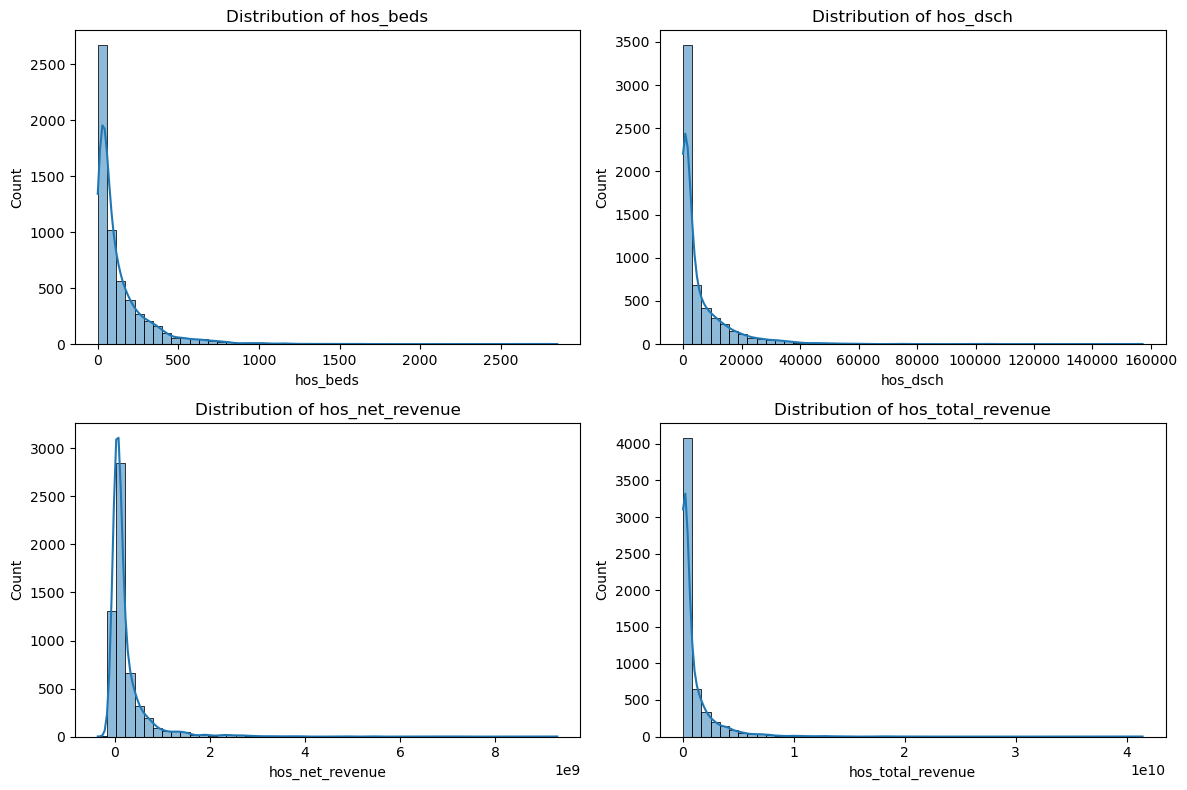

In [243]:
# Visualize distributions of key numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ["hos_beds", "hos_dsch", "hos_net_revenue", "hos_total_revenue"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df_cleaned[col].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [178]:
## hos_net_rev and hos_total_rev have high correlation
## As "hos_beds" and "hos_dsch" have similar distributions, it suggests that hospitals with more beds tend to have more discharges.

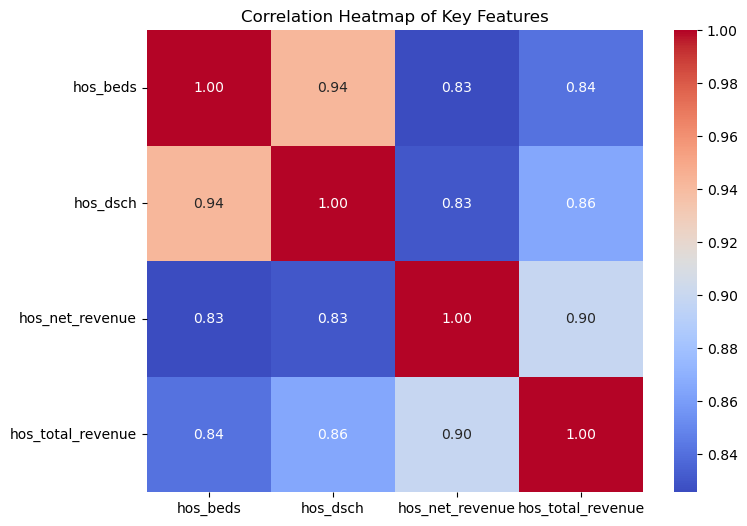

In [245]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()


In [247]:
# Log Transformation to reduce skewness
import numpy as np
log_transform_cols = ["hos_beds", "hos_dsch", "hos_net_revenue", "hos_total_revenue"]
for col in log_transform_cols:
    df_cleaned[f"log_{col}"] = np.log1p(df_cleaned[col])

C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\3432018131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f"log_{col}"] = np.log1p(df_cleaned[col])
C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\3432018131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f"log_{col}"] = np.log1p(df_cleaned[col])
C:\Users\shruti shreya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method

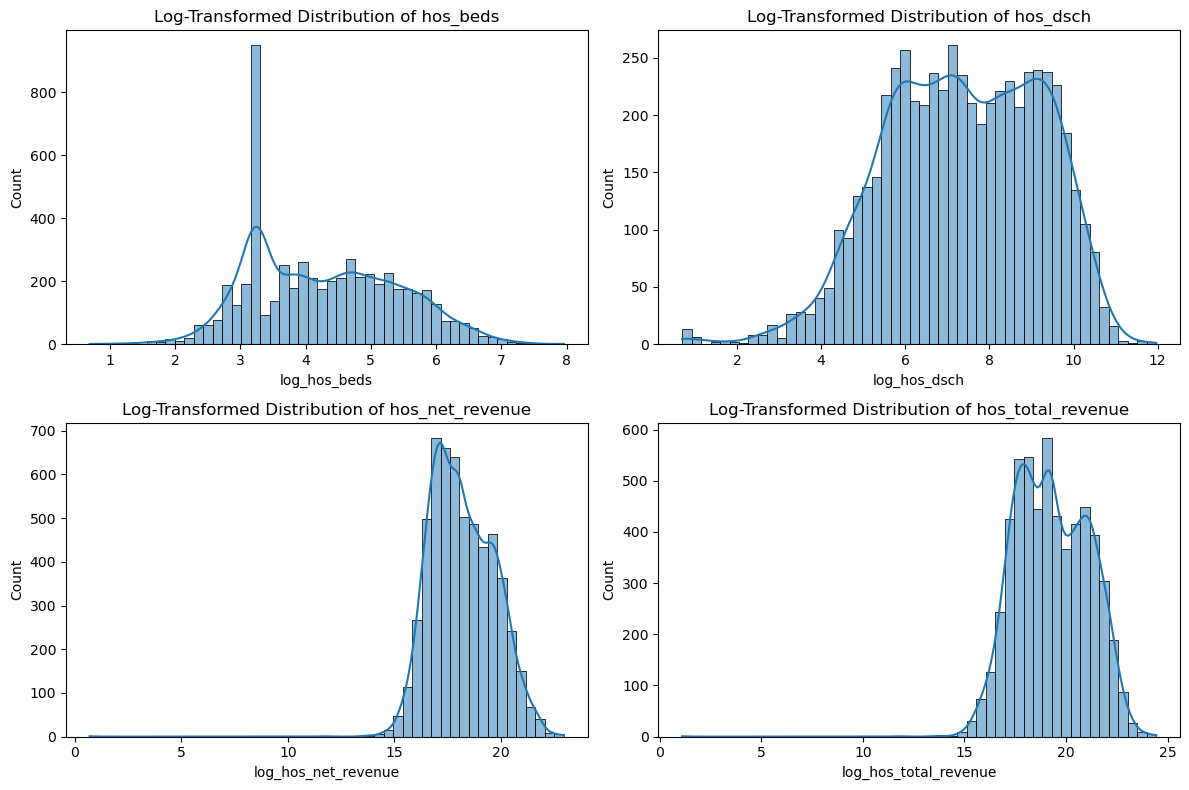

In [249]:
# Visualize distributions after log transformation
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(log_transform_cols):
    sns.histplot(df_cleaned[f"log_{col}"].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Log-Transformed Distribution of {col}")
plt.tight_layout()
plt.show()

In [251]:
# Feature Engineering
# Creating revenue per bed metric
df_cleaned["revenue_per_bed"] = df_cleaned["hos_net_revenue"] / df["hos_beds"]

# Creating discharge rate
df_cleaned["discharge_rate"] = df_cleaned["hos_dsch"] / df["hos_beds"]

# Categorizing hospitals based on revenue
percentile_75 = df_cleaned["hos_net_revenue"].quantile(0.75)
df["high_revenue_hospital"] = df_cleaned["hos_net_revenue"].apply(lambda x: "High" if x >= percentile_75 else "Low")

C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\1655804008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["revenue_per_bed"] = df_cleaned["hos_net_revenue"] / df["hos_beds"]
C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\1655804008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["discharge_rate"] = df_cleaned["hos_dsch"] / df["hos_beds"]


In [253]:
df_cleaned.head()

,compendium_hospital_id,ccn,hospital_name,hospital_street,hospital_city,hospital_state,hospital_zip,acutehosp_flag,health_sys_id,health_sys_name,...,hos_highuc,hos_ownership,hos_net_revenue,hos_total_revenue,log_hos_beds,log_hos_dsch,log_hos_net_revenue,log_hos_total_revenue,revenue_per_bed,discharge_rate
0,CHSP00000003,390163,Armstrong County Memorial,One Nolte Drive,Kittanning,PA,16201,1,HSI00000051,Armstrong County Memorial Hospital,...,0.0,1.0,119911605.0,463759916.0,4.564348,7.949444,18.602265,19.954878,1.262227e+06,29.821053
1,CHSP00000004,050226,Anaheim Regional Medical Center,1111 West La Palma Avenue,Anaheim,CA,92801,1,NaN,Unknown,...,1.0,5.0,158212291.0,958154036.0,5.411646,8.811205,18.879448,20.680519,7.094722e+05,30.080717
2,CHSP00000006,292007,Las Vegas Amg Specialty Hospital,4015 Mcleod Drive,Las Vegas,NV,89121,0,NaN,Unknown,...,0.0,5.0,8659055.0,16020587.0,3.218876,4.890349,15.974116,16.589385,3.607940e+05,5.500000
3,CHSP00000007,152025,Central Indiana-Amg Specialty Hospit,"2401 West University Avenue, 8th Floor",Muncie,IN,47303,0,NaN,Unknown,...,0.0,5.0,24669445.0,45026758.0,3.737670,6.490724,17.021076,17.622768,6.016938e+05,16.048780
4,CHSP00000010,322003,Albuquerque - Amg Specialty Hospital,"5400 Gibson Boulevard Se, 3rd Floor",Albuquerque,NM,87108,0,NaN,Unknown,...,0.0,5.0,20173157.0,40620537.0,3.496508,5.834811,16.819863,17.519784,6.304112e+05,10.656250


In [255]:
df_cleaned.columns

Index(['compendium_hospital_id', 'ccn', 'hospital_name', 'hospital_street',
       'hospital_city', 'hospital_state', 'hospital_zip', 'acutehosp_flag',
       'health_sys_id', 'health_sys_name', 'health_sys_city',
       'health_sys_state', 'corp_parent_id', 'corp_parent_name',
       'corp_parent_type', 'hos_beds', 'hos_dsch', 'hos_res', 'hos_children',
       'hos_majteach', 'hos_vmajteach', 'hos_teachint', 'hos_highdpp',
       'hos_ucburden', 'hos_highuc', 'hos_ownership', 'hos_net_revenue',
       'hos_total_revenue', 'log_hos_beds', 'log_hos_dsch',
       'log_hos_net_revenue', 'log_hos_total_revenue', 'revenue_per_bed',
       'discharge_rate'],
      dtype='object')

## Model dev

In [336]:
data=df_cleaned[['log_hos_beds', 'log_hos_dsch', 'log_hos_total_revenue', 'hos_ownership', 'corp_parent_type', 'health_sys_id', 'log_hos_net_revenue']]
data.head()

,log_hos_beds,log_hos_dsch,log_hos_total_revenue,hos_ownership,corp_parent_type,health_sys_id,log_hos_net_revenue
0,4.564348,7.949444,19.954878,1.0,INTEGRATED DELIVERY NETWORK (IDN),HSI00000051,18.602265
1,5.411646,8.811205,20.680519,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,18.879448
2,3.218876,4.890349,16.589385,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,15.974116
3,3.737670,6.490724,17.622768,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,17.021076
4,3.496508,5.834811,17.519784,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,16.819863


In [338]:
data.columns

Index(['log_hos_beds', 'log_hos_dsch', 'log_hos_total_revenue',
       'hos_ownership', 'corp_parent_type', 'health_sys_id',
       'log_hos_net_revenue'],
      dtype='object')

In [340]:
# mode_health_sys_id = data['health_sys_id'].mode()[0] 
# data['health_sys_id'] = data['health_sys_id'].fillna(mode_health_sys_id) 

In [342]:
data['hos_ownership']

0       1.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
6785    5.0
6789    5.0
6794    5.0
6796    1.0
6798    1.0
Name: hos_ownership, Length: 5705, dtype: float64

In [344]:
x= data[['log_hos_beds', 'log_hos_dsch', 'log_hos_total_revenue', 'hos_ownership', 'corp_parent_type', 'health_sys_id']]

In [346]:
y= data[['log_hos_net_revenue']]

### checking assumptions for linear regression

In [332]:
# linearity of i/p vs o/p col

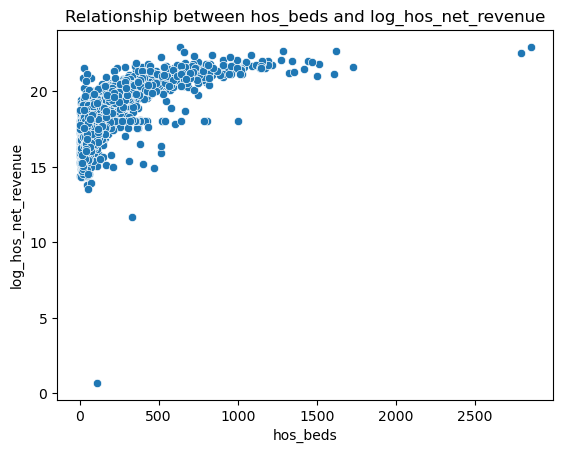

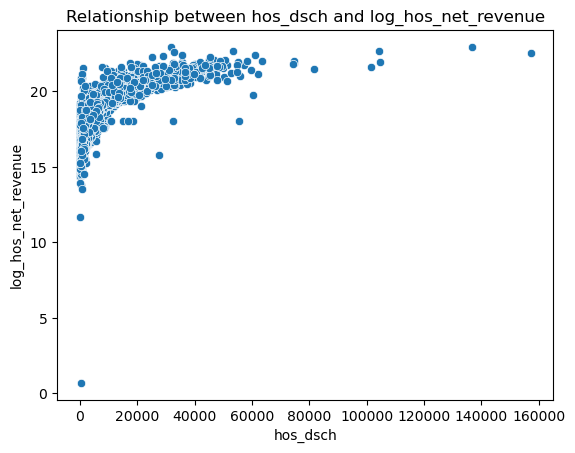

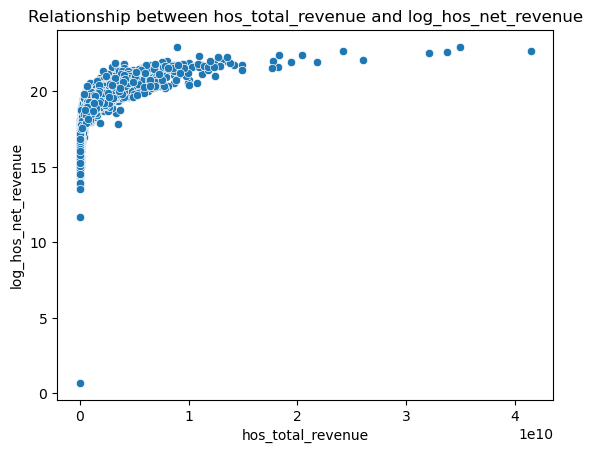

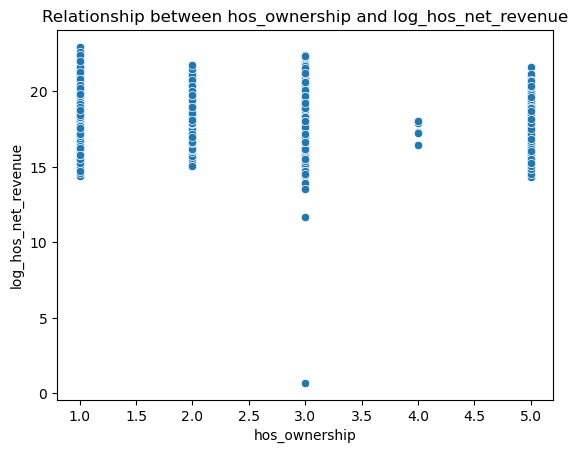

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots to visualize the relationships
for col in ['hos_beds', 'hos_dsch', 'hos_total_revenue', 'hos_ownership']:
    sns.scatterplot(x=df[col], y=data['log_hos_net_revenue'])
    plt.title(f'Relationship between {col} and log_hos_net_revenue')
    plt.show()


In [307]:
# not linear, hence LR is not suitable

In [309]:
# random forest assumptions

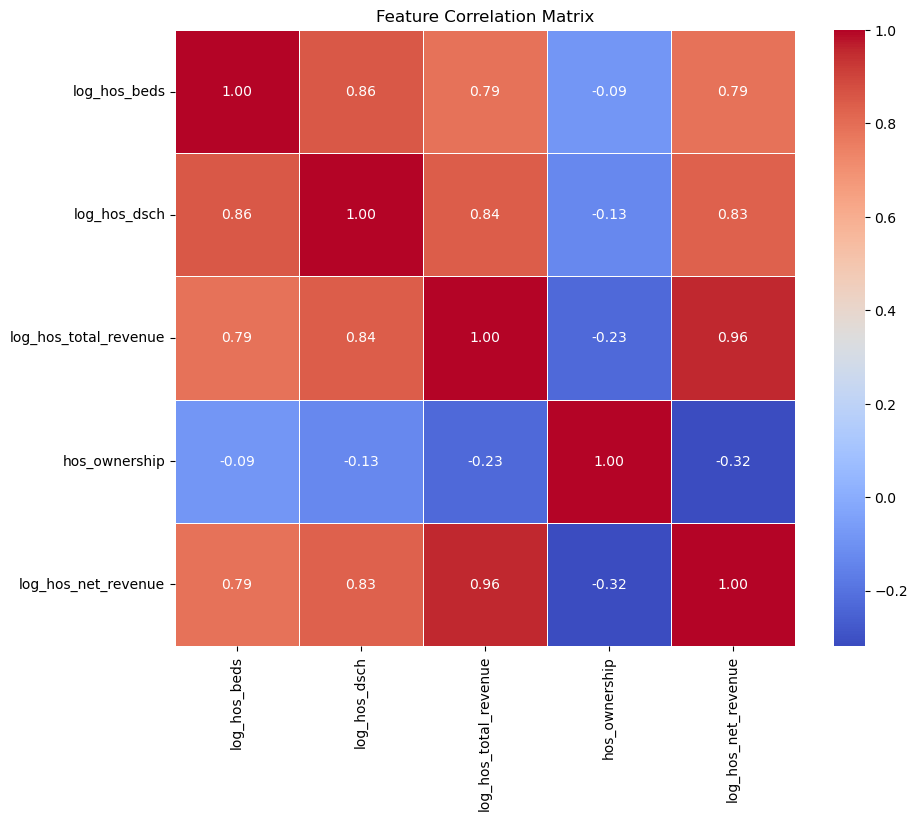

In [350]:
# Check correlation between features using Pearson correlation
corr_data= data[['log_hos_beds', 'log_hos_dsch', 'log_hos_total_revenue', 'hos_ownership', 'log_hos_net_revenue']]
corr_matrix = corr_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data[['log_hos_beds', 'log_hos_dsch', 'log_hos_total_revenue', 'hos_ownership']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
print(vif_data)

                 feature        VIF
0           log_hos_beds  59.976751
1           log_hos_dsch  74.512056
2  log_hos_total_revenue  41.469919
3          hos_ownership   3.331454


In [358]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the correlated features
corr_features = ["log_hos_beds", "log_hos_dsch"]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[corr_features])

# Apply PCA
pca = PCA(n_components=1)  # Reduce to one component
pca_features = pca.fit_transform(scaled_data)

# Add PCA feature to the dataframe
data["log_beds_discharges_pca"] = pca_features

# Drop the original features
data_pca = data.drop(columns=["log_hos_beds", "log_hos_dsch"])


C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_23696\1758206674.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["log_beds_discharges_pca"] = pca_features


In [362]:
data_pca.head()

,log_hos_total_revenue,hos_ownership,corp_parent_type,health_sys_id,log_hos_net_revenue,log_beds_discharges_pca
0,19.954878,1.0,INTEGRATED DELIVERY NETWORK (IDN),HSI00000051,18.602265,0.401570
1,20.680519,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,18.879448,1.270455
2,16.589385,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,15.974116,-1.632726
3,17.622768,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,17.021076,-0.685405
4,17.519784,5.0,INTEGRATED DELIVERY NETWORK (IDN),NaN,16.819863,-1.091690


In [370]:
X= data_pca[['log_hos_total_revenue', 'hos_ownership', 'log_beds_discharges_pca']]
Y= data_pca[['log_hos_net_revenue']]

In [376]:
X.isnull().sum()

log_hos_total_revenue      0
hos_ownership              0
log_beds_discharges_pca    0
dtype: int64

In [390]:
Y.isnull()

,log_hos_net_revenue
0,False
1,False
2,False
3,False
4,False
...,...
6785,False
6789,False
6794,False
6796,False


In [392]:
Y = data_pca[['log_hos_net_revenue']].dropna()

In [394]:
Y.isnull().sum()

log_hos_net_revenue    0
dtype: int64

In [398]:
X = X.loc[Y.index] 

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Split the Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Step 4: Predictions and Model Evaluation
y_pred = rf.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

C:\Users\shruti shreya\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.2676782813981747
Root Mean Squared Error: 0.5173763440651058
R-squared: 0.8937686512236263
